In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

11929
187693


In [5]:
# Print the numbers of galaxies that needed to be masked


print(np.sum(shapes[('All','e1')]==-9999))
print(np.sum(shapes[('All','e2')]==-9999))
print(np.sum(shapes['All','flags_select']==0))
print(np.sum(shapes[('All','PP')]<=0.55))

0
0
187693
0


In [6]:
#masking
print(len(clusters))
print(len(shapes))

11929
187693


# Stats of e1,e2

count    187693.000000
mean         -0.000250
std           0.148246
min          -0.728444
25%          -0.081355
50%          -0.000150
75%           0.080657
max           0.852003
Name: (All, e2), dtype: float64

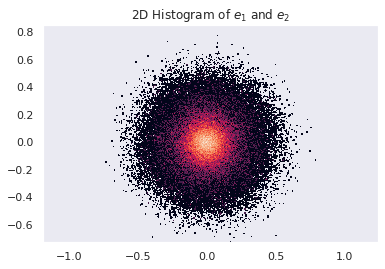

In [7]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    187693.000000
mean          0.810126
std         280.932717
min      -44173.333800
25%          -1.006441
50%           0.000629
75%           0.999558
max       67310.028672
dtype: float64

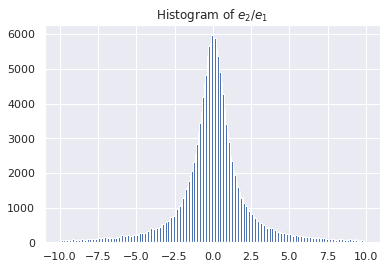

In [8]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [9]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [10]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [11]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.531306e+01 
StdE:5.959422e-02 


count    187693.000000
mean         45.313056
std          25.818332
min           0.000277
25%          22.500000
50%          45.560296
75%          67.500000
max          89.999729
Name: (All, phi), dtype: float64

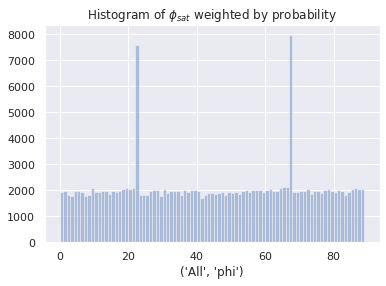

In [12]:
BINS=np.arange(0,90,1)
ax = sns.distplot(shapes[('All','phi')],bins=BINS,kde=False)
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Abnormal Analysis

In [13]:
np.sum((shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)) 
abn_1 = shapes[(shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)]
abn_2 = shapes[(shapes[('All','phi')]>67.4) &(shapes[('All','phi')]<=67.6)]

In [14]:
corr_1=abn_1.corr(method='pearson')[('All','phi')]
corr_2=abn_2.corr(method='pearson')[('All','phi')]

In [15]:
display(HTML((pd.concat([pd.DataFrame(corr_1),pd.DataFrame(corr_2)],axis=1)).to_html()))
# display(corr_2.to_html())

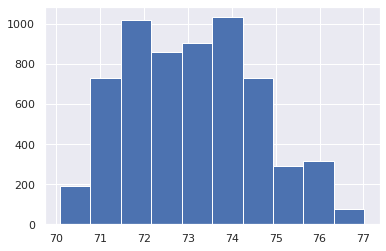

In [16]:
abn_1[('All','RA')].hist()
#RA of objects with ϕ=22.5

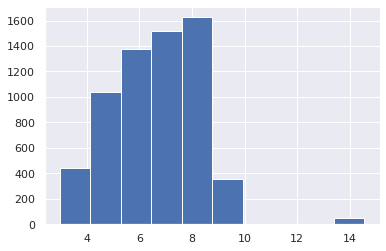

In [17]:
abn_2[('All','RA')].hist()
#RA of objects with ϕ=67.5

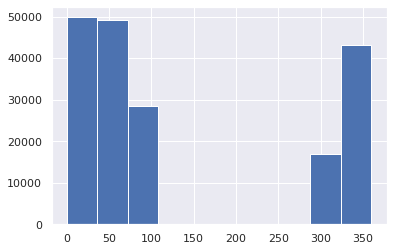

In [18]:
shapes[('All','RA')].hist()
#RA of all objects

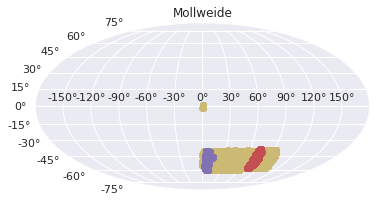

In [19]:
abn_1_Coor=SkyCoord(abn_1['All','RA'],abn_1['All','DEC'],unit=u.deg)
abn_2_Coor=SkyCoord(abn_2['All','RA'],abn_2['All','DEC'],unit=u.deg)
shape_Coor=SkyCoord(shapes['All','RA'],shapes['All','DEC'],unit=u.deg)


plt.figure()
plt.subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.grid(True)
plt.scatter(shape_Coor.ra.radian, shape_Coor.dec.radian,color='y')
plt.scatter(abn_1_Coor.ra.radian, abn_1_Coor.dec.radian,color='r')
plt.scatter(abn_2_Coor.ra.radian, abn_2_Coor.dec.radian,color='m')
plt.show()

In [20]:
# np.save("/home/cz136/project/sa/data/im3_225_id.npy",abn_1.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_id.npy",abn_2.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_ra.npy",abn_1[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_dec.npy",abn_1[('All','dec')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_ra.npy",abn_2[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_dec.npy",abn_2[('All','dec')].to_numpy())

# Analysis around 22.5 and 67.5

In [21]:
#Print out the most crowded bins

phi_count=np.histogram(phi_1d,bins=BINS)
sort=np.argsort(-phi_count[0])
print(phi_count[1][sort])
print(phi_count[0][sort])

[67 22 65 66 64 19 86  9 21 87 88 72 18 78 20 30 61 85 77 56 81 36 57 60
 39 38 27 54 58 28  5 17 82  1 63 34  4 15 12 74 62 40 26 32 13 70 71 33
 75 53 79 68 47 51  0 69 59 37 10 80 16 11 55 49 84  6 31 43 46 44 50 76
 52 14 45 73  2 42  8 23 83 25 35 48 24  7  3 29 41]
[7969 7593 2139 2113 2085 2084 2078 2077 2074 2069 2059 2053 2049 2048
 2044 2042 2038 2034 2031 2030 2030 2028 2028 2024 2014 2011 2010 2005
 2002 2002 1991 1991 1991 1987 1986 1981 1977 1975 1975 1971 1970 1969
 1966 1966 1965 1963 1963 1963 1962 1958 1957 1953 1952 1950 1948 1943
 1942 1940 1934 1932 1931 1928 1927 1927 1925 1924 1916 1911 1910 1901
 1897 1887 1876 1862 1855 1844 1835 1833 1831 1831 1831 1826 1826 1823
 1823 1799 1782 1780 1688]


count    7969.000000
mean       22.526358
std         0.186755
min        22.001008
25%        22.500000
50%        22.500000
75%        22.500000
max        23.194023
Name: (All, phi), dtype: float64

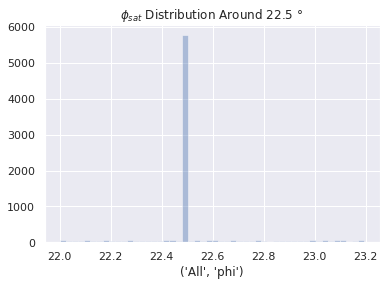

In [22]:
#Statistics around 22.5
first_cluster_left=np.sum(phi_count[0][0:22])
first_length=phi_count[0][sort][0]
first_cluster=phi_1d[first_cluster_left:first_cluster_left+first_length]
ax = sns.distplot(first_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 22.5 $\degree$")
pd.Series(first_cluster).describe()

count    7969.000000
mean       67.496736
std         0.145938
min        67.000531
25%        67.500000
50%        67.500000
75%        67.500000
max        67.999551
Name: (All, phi), dtype: float64

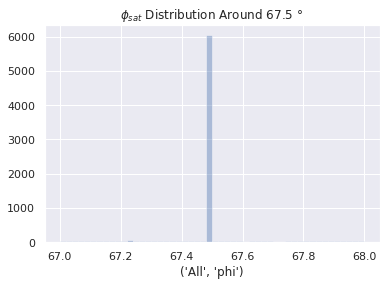

In [23]:
second_cluster_left=np.sum(phi_count[0][0:67])
second_length=phi_count[0][sort][0]
second_cluster=phi_1d[second_cluster_left:second_cluster_left+second_length]
ax = sns.distplot(second_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 67.5 $\degree$")
pd.Series(second_cluster).describe()

# Get e

## Statistics of e1 and e2

In [24]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    187693.000000
mean          0.000233
std           0.147565
min          -0.733436
25%          -0.080044
50%          -0.000124
75%           0.080632
max           0.789564
Name: (All, e1), dtype: float64

In [25]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    187693.000000
mean         -0.000250
std           0.148246
min          -0.728444
25%          -0.081355
50%          -0.000150
75%           0.080657
max           0.852003
Name: (All, e2), dtype: float64

In [26]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [27]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=-1.086872e-03, std_mean=3.439978e-04


count    187693.000000
mean         -0.001087
std           0.149032
min          -0.707431
25%          -0.084702
50%          -0.000076
75%           0.081266
max           0.790708
Name: (All, ep), dtype: float64

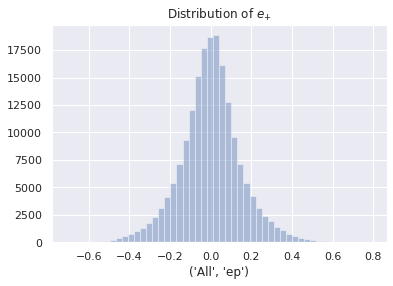

In [28]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=2.697903e-03, std_mean=3.387132e-04


count    187693.000000
mean          0.002698
std           0.146743
min          -0.750668
25%          -0.075867
50%           0.006274
75%           0.081558
max           0.786804
Name: (All, ex), dtype: float64

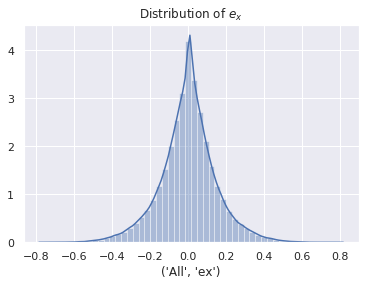

In [29]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()